### ARCH (Autoregressive Conditional Heteroskedasticity)

$y_{t}=\frac{x_{t} - x_{t-1}}{x_{t-1}}$ (returns)

$\sigma_{t}^2 = \frac{1}{t}\sum_{i=1}^{t}(y_{t}-\bar{y})^2=\frac{1}{t}\sum_{i=1}^{t}y_{t}^2=\frac{1}{1}\sum_{i=1}^{1}y_{t}^2=y_{t}^2$ (variance or volatility of $y_{t}$; mean returns is zero and only one observation is possible)

ARCH(p) describes an ARCH model with p lags. The simplest model would be ARCH(1) as follows.

(1) $\sigma_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2$ (volatility of $y_{t}$ is conditional on $y_{t-1}$; may add more terms for more lags)

(2) $y_{t}=\sigma_{t}\epsilon_{t}=\epsilon_{t}\sqrt{\alpha_{0}+\alpha_{1}y_{t-1}^2}$

(3) $y_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\epsilon_{t}$

$\epsilon_{t} \sim N(\mu=0,\sigma^2=1)$ (error)

### GARCH (Generalized ARCH)

GARCH improves ARCH by including volatility from the previous time step in the current volatility term such that the causal relationship between periods of high or low volatility are considered.

GARCH(p, q) describes an GARCH model with p-order of $\sigma^2$ and q-order of $y_{t}$. The simplest model would be GARCH(1,1) as follows.

(1) $\sigma_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2$

(2) $y_{t}=\sigma_{t}\epsilon_{t}=\epsilon_{t}\sqrt{\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2}$

(3) $y_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2+\epsilon_{t}$

$\epsilon_{t} \sim N(\mu=0,\sigma^2=1)$ (error) 

#### Conditions
(1) Time series must be stationary at a mean of zero.

(2) Time series must exhibit periods of similar volatility.

(3) Use the PACF (Partial Autocorrelation Function) to find the appropriate number of lags. PACF yields the correlation between lagged values within a stationary time series.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from arch import arch_model
from download import download

apikey = open("apikey", "r").readline()

In [2]:
ticker = input("Ticker: ")
dat = download(ticker, apikey)
print(dat)

Ticker: SPY
            date  adjClose
0     2000-01-03     94.60
1     2000-01-04     90.90
2     2000-01-05     91.06
3     2000-01-06     89.59
4     2000-01-07     94.80
...          ...       ...
5940  2023-08-14    448.11
5941  2023-08-15    442.89
5942  2023-08-16    439.64
5943  2023-08-17    436.29
5944  2023-08-18    436.47

[5945 rows x 2 columns]


In [3]:
t0 = np.array(dat["adjClose"].iloc[0:-1])
t1 = np.array(dat["adjClose"].iloc[1:])

returns = (t1 - t0) * 100 / t0
print(pd.DataFrame(returns).describe())

                 0
count  5944.000000
mean      0.033445
std       1.242006
min     -10.944981
25%      -0.481259
50%       0.064768
75%       0.602527
max      14.517828


[Text(0.5, 0, 'SPY P&L'), Text(0, 0.5, 'Frequency')]

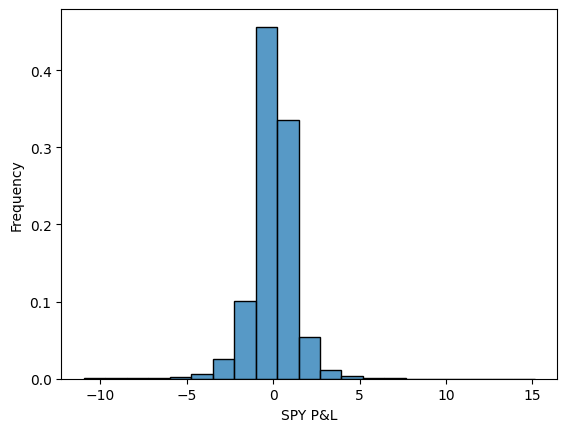

In [4]:
ax = sns.histplot(data=returns, binwidth=np.std(returns), stat="probability")
ax.set(xlabel="{} P&L" .format(ticker), ylabel="Frequency")

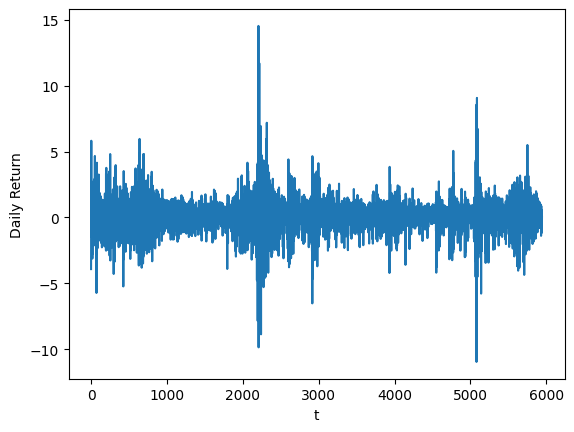

In [5]:
plt.plot(returns)
plt.xlabel("t")
plt.ylabel("Daily Return")
plt.show()

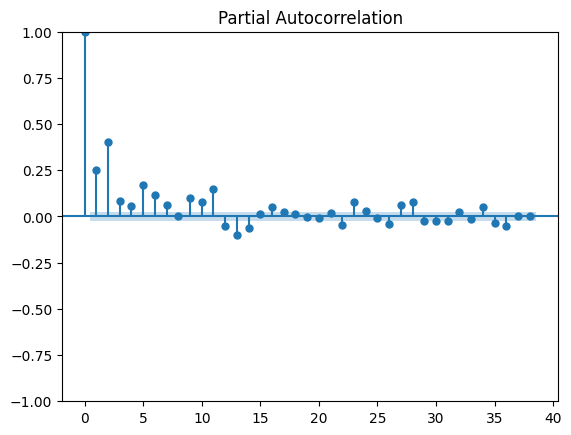

In [6]:
plot_pacf(returns**2)
plt.show()

In [7]:
model = arch_model(returns, p=2,q=2)

In [8]:
model.fit().summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 109689.48928414217
Iteration:      2,   Func. Count:     20,   Neg. LLF: 34524.254401668724
Iteration:      3,   Func. Count:     31,   Neg. LLF: 12592.758788950443
Iteration:      4,   Func. Count:     40,   Neg. LLF: 15550.580328024127
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2407027085.341161
Iteration:      6,   Func. Count:     57,   Neg. LLF: 8416.53737664813
Iteration:      7,   Func. Count:     65,   Neg. LLF: 8254.706122364685
Iteration:      8,   Func. Count:     73,   Neg. LLF: 8228.838367345472
Iteration:      9,   Func. Count:     81,   Neg. LLF: 8224.334884033304
Iteration:     10,   Func. Count:     89,   Neg. LLF: 8223.291093899206
Iteration:     11,   Func. Count:     97,   Neg. LLF: 8223.130276605363
Iteration:     12,   Func. Count:    104,   Neg. LLF: 8223.129955208215
Iteration:     13,   Func. Count:    111,   Neg. LLF: 8223.12994526522
Iteration:     14,   Func. Count:    117,   Neg. LLF: 8223.129

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8223.13
Distribution:                  Normal   AIC:                           16458.3
Method:            Maximum Likelihood   BIC:                           16498.4
                                        No. Observations:                 5944
Date:                Sat, Aug 19 2023   Df Residuals:                     5943
Time:                        11:04:14   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0732  1.048e-02      6.983  2.899e-12 [5.263e-02,9.370e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0431  9.239e-03      4.662  3.128e-06 [2.497e-02,6.118e-02]
alpha[1]       0.0858  2.052e-02      4.181  2.908e-05   [4.556e-02,  0.126]
alpha[2]       0.1355  2.202e-02      6.153  7.582e-10   [9.236e-02,  0.179]
beta[1]        0.2028      0.202      1.004      0.315     [ -0.193,  0.599]
beta[2]        0.5455      0.180      3.030  2.446e-03     [  0.193,  0.898]
============================================================================

Covariance estimator: robust
"""

In [9]:
pred = []
test_size = 300
for i in range(test_size):
    test = returns[:-test_size+i]
    model = arch_model(test, p=2, q=2)
    yhat = model.fit(disp="off").forecast(horizon=1).variance.values[-1,:][0]
    pred.append(yhat)

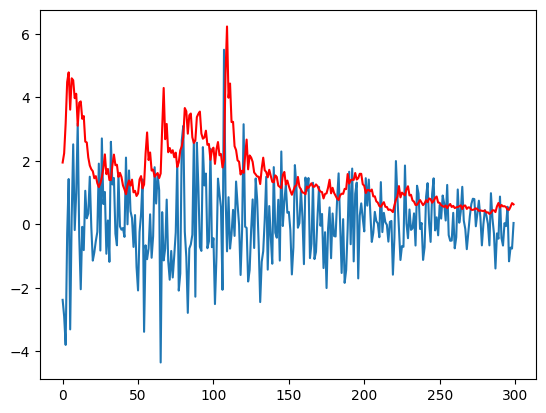

In [10]:
plt.plot(returns[-test_size:])
plt.plot(pred, color="red")
plt.show()

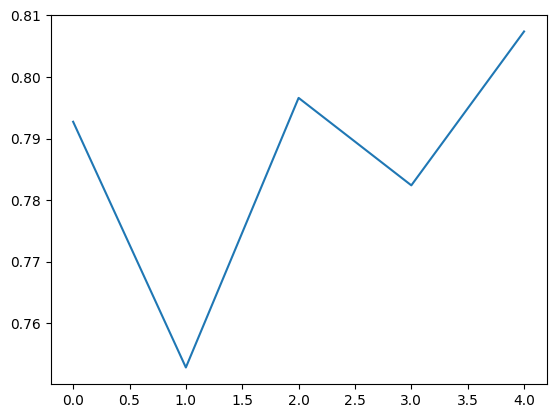

In [11]:
model = arch_model(returns, p=2, q=2)
yhat = np.sqrt(model.fit(disp="off").forecast(horizon=5).variance.values[-1,:])
plt.plot(yhat)